# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("data/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [4]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [5]:
mapping_day = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}



df["flight_day"] = df["flight_day"].map(mapping_day)


In [6]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [7]:
df['sales_channel'].unique()
mapping_sales = {"Internet": 1, "Mobile": 2}

df['trip_type'].unique()
mapping_trip = {"RoundTrip": 1, "CircleTrip": 2, "OneWay": 3}

df["trip_type"] = df["trip_type"].map(mapping_trip)
df["sales_channel"] = df["sales_channel"].map(mapping_sales)

#df['route'].unique()

#df['booking_origin'].unique()

## Larger Categoricals

In [8]:
# Apply One Hot Encoding to the remaining non-numeric columns (route and booking_origin)
df = pd.get_dummies(df, columns=['route', 'booking_origin'], prefix=['route', 'booking_origin'])
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,...,booking_origin_Timor-Leste,booking_origin_Tonga,booking_origin_Tunisia,booking_origin_Turkey,booking_origin_Ukraine,booking_origin_United Arab Emirates,booking_origin_United Kingdom,booking_origin_United States,booking_origin_Vanuatu,booking_origin_Vietnam
0,2,1,1,262,19,7,6,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,112,20,3,6,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1,1,243,22,17,3,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,96,31,4,6,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2,1,1,68,22,15,3,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [9]:
df.describe()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,...,booking_origin_Timor-Leste,booking_origin_Tonga,booking_origin_Tunisia,booking_origin_Turkey,booking_origin_Ukraine,booking_origin_United Arab Emirates,booking_origin_United Kingdom,booking_origin_United States,booking_origin_Vanuatu,booking_origin_Vietnam
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.0000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,1.112360,1.017800,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,...,0.000040,0.000020,0.000040,0.000180,0.0001,0.000840,0.003460,0.009120,0.000020,0.007760
std,1.020165,0.315812,0.181559,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,...,0.006324,0.004472,0.006324,0.013415,0.0100,0.028971,0.058721,0.095063,0.004472,0.087749
min,1.000000,1.000000,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,1.000000,1.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.000000,2.000000,3.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

In [10]:
#features = features = [col for col in df.columns if col != 'booking_complete']
#df_feat = pd.DataFrame(df[features], columns=features)

In [11]:
import time
start_time_0 = time.time()

# Scaling the features using a min-max scaler
from sklearn.preprocessing import MinMaxScaler
# Specify the columns to scale
features = [col for col in df.columns if col != 'booking_complete']
print(features)
scaler = MinMaxScaler()

# Scale the selected columns and convert to DataFrame
df_feat = pd.DataFrame(scaler.fit_transform(df[features]), columns=features)

end_time_0 = time.time() # Record the end time
elapsed_time_0 = end_time_0 - start_time_0 # Calculate the elapsed time
print(f"Script took {elapsed_time_0:.2f} seconds to run")

['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead', 'length_of_stay', 'flight_hour', 'flight_day', 'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals', 'flight_duration', 'route_AKLDEL', 'route_AKLHGH', 'route_AKLHND', 'route_AKLICN', 'route_AKLKIX', 'route_AKLKTM', 'route_AKLKUL', 'route_AKLMRU', 'route_AKLPEK', 'route_AKLPVG', 'route_AKLTPE', 'route_AORICN', 'route_AORKIX', 'route_AORKTM', 'route_AORMEL', 'route_AORPER', 'route_AORPUS', 'route_BBIMEL', 'route_BBIOOL', 'route_BBIPER', 'route_BBISYD', 'route_BDOCTS', 'route_BDOCTU', 'route_BDOHGH', 'route_BDOICN', 'route_BDOIKA', 'route_BDOKIX', 'route_BDOMEL', 'route_BDOOOL', 'route_BDOPEK', 'route_BDOPER', 'route_BDOPUS', 'route_BDOPVG', 'route_BDOSYD', 'route_BDOTPE', 'route_BDOWUH', 'route_BDOXIY', 'route_BKICKG', 'route_BKICTS', 'route_BKICTU', 'route_BKIDEL', 'route_BKIHND', 'route_BKIICN', 'route_BKIKIX', 'route_BKIKTM', 'route_BKIMEL', 'route_BKIMRU', 'route_BKIOOL', 'route_BKIPEK', 'route_BKIPE

Script took 1.41 seconds to run


## Data Visualisation 

In [12]:
# Visualisation Packages
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Implementing a Random Forest Algorithm

In [13]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [14]:
# Splitting data into a training set and test set
X = df_feat
y = df['booking_complete'] # The target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) # Using Pareto Principle

In [15]:
import time
start_time = time.time()

# Initialising and Fitting the Random Forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test) # predicting on test data

end_time = time.time() # Record the end time
elapsed_time = end_time - start_time # Calculate the elapsed time
print(f"Script took {elapsed_time:.2f} seconds to run")

Script took 34.12 seconds to run


Accuracy: 0.8527
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.98      0.92      8520
           1       0.51      0.13      0.21      1480

    accuracy                           0.85     10000
   macro avg       0.69      0.56      0.57     10000
weighted avg       0.81      0.85      0.81     10000

Confusion Matrix:
 [[8329  191]
 [1282  198]]


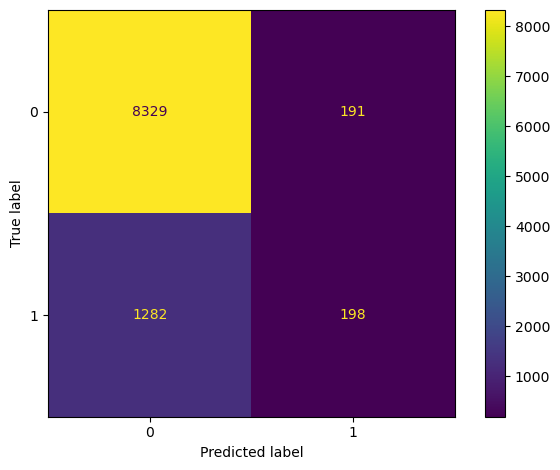

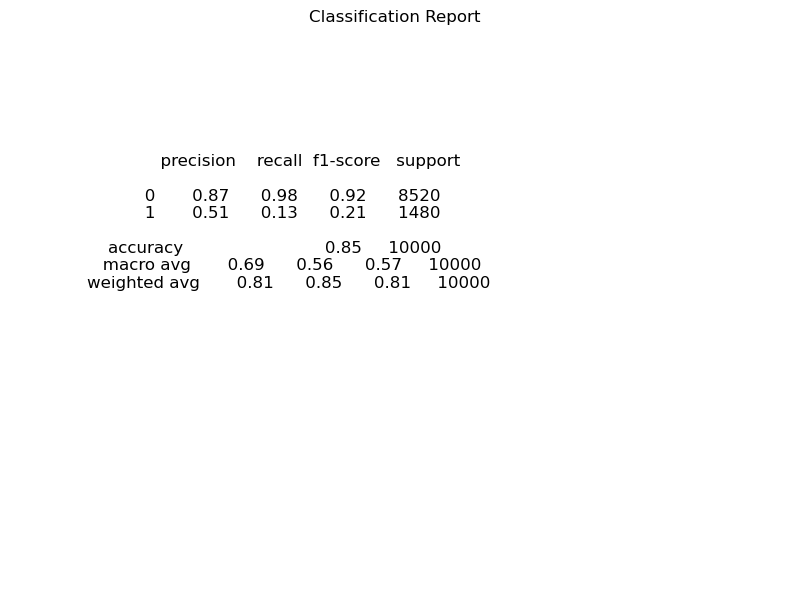

In [16]:
# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)
print("Confusion Matrix:\n", cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.tight_layout()
plt.grid(False)
plt.savefig('plots/confusion_matrix.pdf', dpi = 1200)
plt.show()

# Create a plot for the Classification Report
plt.figure(figsize=(8, 6))
plt.text(0.1, 0.5, report, fontsize=12)  # Add the classification report as text

plt.title('Classification Report')
plt.axis('off')  # Hide axes
plt.tight_layout()
plt.savefig('plots/classification_report.pdf', dpi=1200)
plt.show()

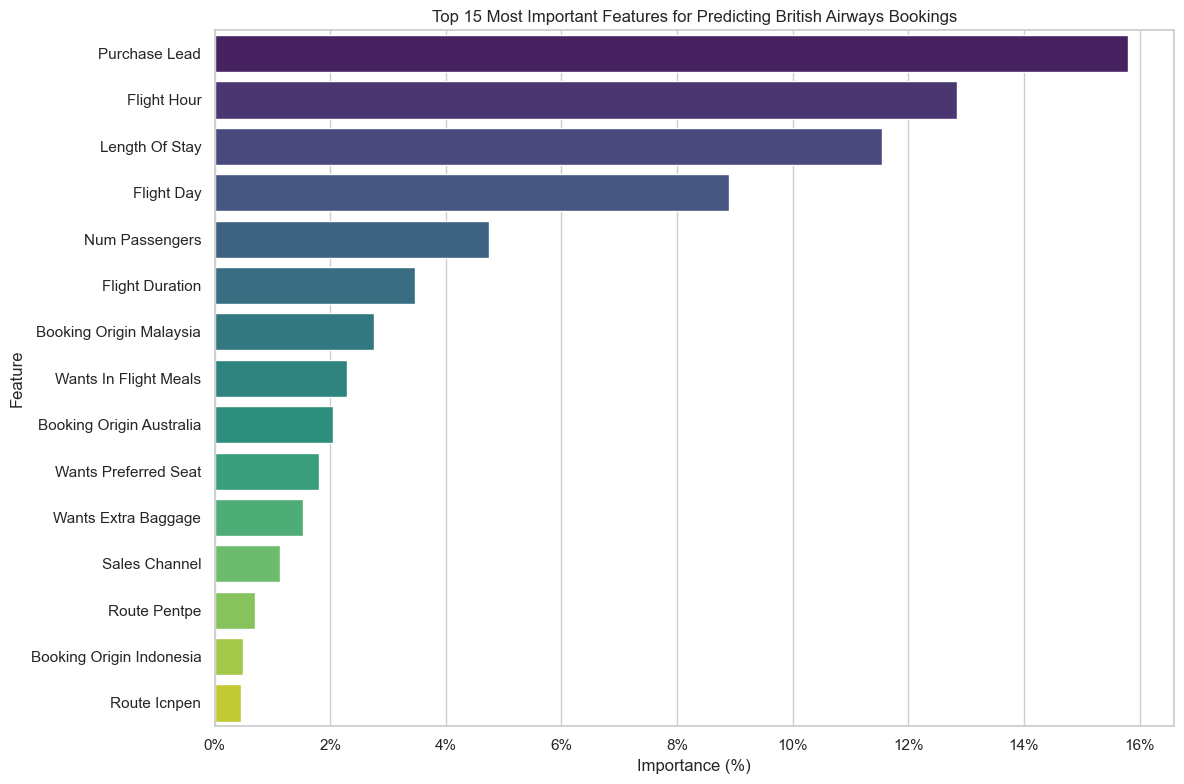

In [17]:
import matplotlib.ticker as mtick

# Extract the features
feat_significance = rf.feature_importances_
feat_names = df_feat.columns
feat_names = [name.replace('_', ' ').title() for name in feat_names]
df_feat_sig = pd.DataFrame({'Feature': feat_names, 'Significance': feat_significance})

# Sort the features by significance in descending order
df_feat_sig = df_feat_sig.sort_values(by='Significance', ascending=False)

# Select the top 15 most important features
top_15_features = df_feat_sig.head(15)

plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
ax = sns.barplot(x='Significance', y="Feature", data=top_15_features, palette="viridis")

# Multiply significance values by 100 and format tick labels as percentages
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=0))

plt.xlabel("Importance (%)")
plt.ylabel("Feature")
plt.title("Top 15 Most Important Features for Predicting British Airways Bookings")
plt.tight_layout()

plt.savefig('plots/feat_sig_barplot.pdf', dpi=1200)
plt.show()